<a href="https://colab.research.google.com/github/asitcoder1/Advanced-Brain-Tumor-Detection-using-Convolutional-Neural-Networks-CNNs-/blob/main/Brain_tumor_updated_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This program trains a CNN model to classify brain tumor images into four categories:
# glioma, meningioma, pituitary tumor, and no tumor. It explores different model
# configurations and evaluates their performance.

In [ ]:
# Step 1: Import Required Libraries
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.preprocessing import LabelEncoder


In [ ]:
# Step 2: Define the Dataset Directory
extraction_dir = '/kaggle/input/braintumor-data/Braintumor Detection'

# Verify the contents of the directory to ensure the data is there
print("Directory contents:", os.listdir(extraction_dir))

# Categories (subfolders) within the extraction directory
categories = ['glioma', 'notumor', 'meningioma', 'pituitary']


Directory contents: ['pituitary', 'notumor', 'meningioma', 'glioma']


In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
from sklearn.preprocessing import LabelEncoder

# Function to load images from the specified directory, preprocess them
# (resize and normalize), and return them as NumPy arrays along with their labels.
def load_and_preprocess_images(base_dir, categories, target_size=(150, 150)):
    images = []
    labels = []

    for category in categories:
        folder_path = os.path.join(base_dir, category)
        image_files = os.listdir(folder_path)

        for img_file in image_files:
            img_full_path = os.path.join(folder_path, img_file)

            # Load the image
            try:
                img = image.load_img(img_full_path, target_size=target_size)
                img_array = image.img_to_array(img)
                img_array /= 255.0  # Normalize pixel values (0-1)
                images.append(img_array)
                labels.append(category)
            except Exception as e:
                print(f"Error loading image {img_full_path}: {e}")

    return np.array(images), np.array(labels)       # function ends

# Load the images and labels
X, y = load_and_preprocess_images(extraction_dir, categories)

# Print the first few labels to see if they are loaded correctly
print("Labels after loading images:", y)

# Check unique labels before encoding
unique_labels, counts = np.unique(y, return_counts=True)
print("Unique labels and their counts:", dict(zip(unique_labels, counts)))

# Step 4: Encode Labels
label_encoder = LabelEncoder()

# Check the type of y before encoding
print("Type of y before encoding:", type(y))
print("Data type of y elements:", type(y[0]))

y_encoded = label_encoder.fit_transform(y)

# Verify label encoding
print("Label classes:", label_encoder.classes_)
print("Encoded labels:", y_encoded[:10])  # Show first 10 encoded labels

# Verify unique encoded labels
unique_encoded_labels, encoded_counts = np.unique(y_encoded, return_counts=True)
print("Unique encoded labels and their counts:", dict(zip(unique_encoded_labels, encoded_counts)))


Labels after loading images: ['glioma' 'glioma' 'glioma' ... 'pituitary' 'pituitary' 'pituitary']
Unique labels and their counts: {'glioma': 1321, 'meningioma': 1339, 'notumor': 1595, 'pituitary': 1457}
Type of y before encoding: <class 'numpy.ndarray'>
Data type of y elements: <class 'numpy.str_'>
Label classes: ['glioma' 'meningioma' 'notumor' 'pituitary']
Encoded labels: [0 0 0 0 0 0 0 0 0 0]
Unique encoded labels and their counts: {0: 1321, 1: 1339, 2: 1595, 3: 1457}


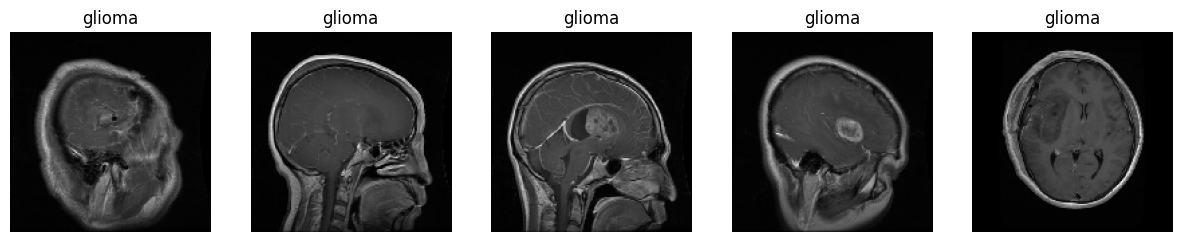

In [ ]:
def display_images_with_labels(X, y, labels, num_images=5):

    ###This function displays a specified number of images with their corresponding labels.
   ### It provides a visual representation of the dataset.

    plt.figure(figsize=(15, 8))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(X[i])  # Show the image
        plt.title(labels[i])  # Show the label of the image
        plt.axis('off')  # Hide axis
    plt.show()  #function ends

# Show 5 images with their corresponding labels
display_images_with_labels(X, y, y[:5], num_images=5)

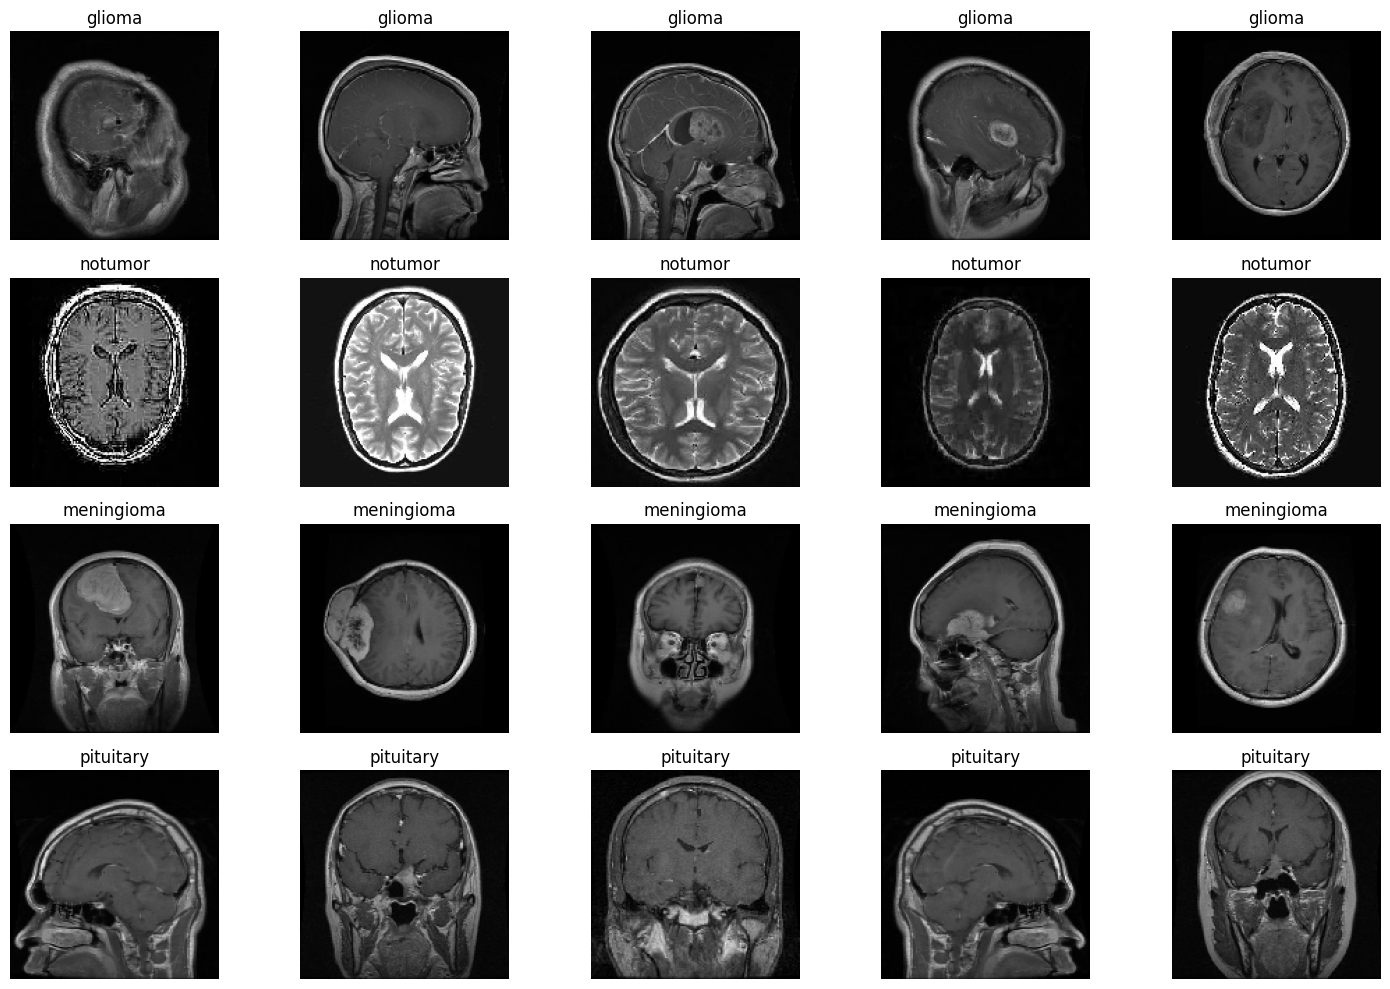

In [ ]:
def display_images_by_category(X, y, categories, num_images_per_category=5):

   """
    This function displays a few images from each category to provide a visual breakdown of the dataset.
    """
    plt.figure(figsize=(15, 10))
    for i, category in enumerate(categories):
        # Get indices of images that belong to this category
        category_indices = np.where(y == category)[0]

        # Display a few images from the category
        for j in range(min(num_images_per_category, len(category_indices))):
            plt.subplot(len(categories), num_images_per_category, i * num_images_per_category + j + 1)
            plt.imshow(X[category_indices[j]])  # Show the image
            plt.title(category)  # Show the category name as title
            plt.axis('off')  # Hide axis

    plt.tight_layout()
    plt.show()   #function ends

# Show 5 images for each category
display_images_by_category(X, y, categories, num_images_per_category=5)

In [ ]:
unique_labels, counts = np.unique(y, return_counts=True)
dataset_table = dict(zip(unique_labels, counts))
print(dataset_table)


{'glioma': 1321, 'meningioma': 1339, 'notumor': 1595, 'pituitary': 1457}


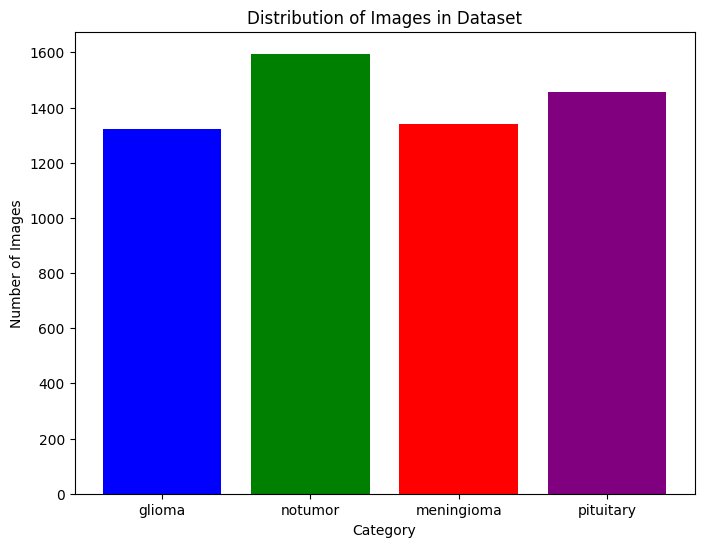

In [ ]:
# Visualize the dataset distribution (number of images per category)

import matplotlib.pyplot as plt
import numpy as np

# Data from your dataset (unique categories and their counts)
categories = ['glioma', 'notumor', 'meningioma', 'pituitary']
counts = [1321, 1595, 1339, 1457]  # Example counts, replace with actual counts

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(categories, counts, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Category')
plt.ylabel('Number of Images')
plt.title('Distribution of Images in Dataset')
plt.show()


In [ ]:
for category in categories:
    folder_path = os.path.join(extraction_dir, category)

X, y = load_and_preprocess_images(extraction_dir, categories)
print("Labels after loading images:", y)



Labels after loading images: ['glioma' 'glioma' 'glioma' ... 'pituitary' 'pituitary' 'pituitary']


In [ ]:
unique, counts = np.unique(y, return_counts=True)
print("Class counts:", dict(zip(unique, counts)))


Class counts: {'glioma': 1321, 'meningioma': 1339, 'notumor': 1595, 'pituitary': 1457}


In [ ]:
# Step 4: Encode Labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Verify label encoding
print("Label classes:", label_encoder.classes_)
print("Encoded labels:", y_encoded[:10])


Label classes: ['glioma' 'meningioma' 'notumor' 'pituitary']
Encoded labels: [0 0 0 0 0 0 0 0 0 0]


In [ ]:
# Step 5: Define Train-Test Ratios
ratios = [(0.3, 0.7), (0.5, 0.5), (0.7, 0.3), (0.9, 0.1)]
test_accuracies = []
train_accuracies = []
confusion_matrices = []
classification_reports = []


In [ ]:
# Step 6: Create the CNN Model
def create_model():

   ## This function creates a CNN model
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(len(categories), activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


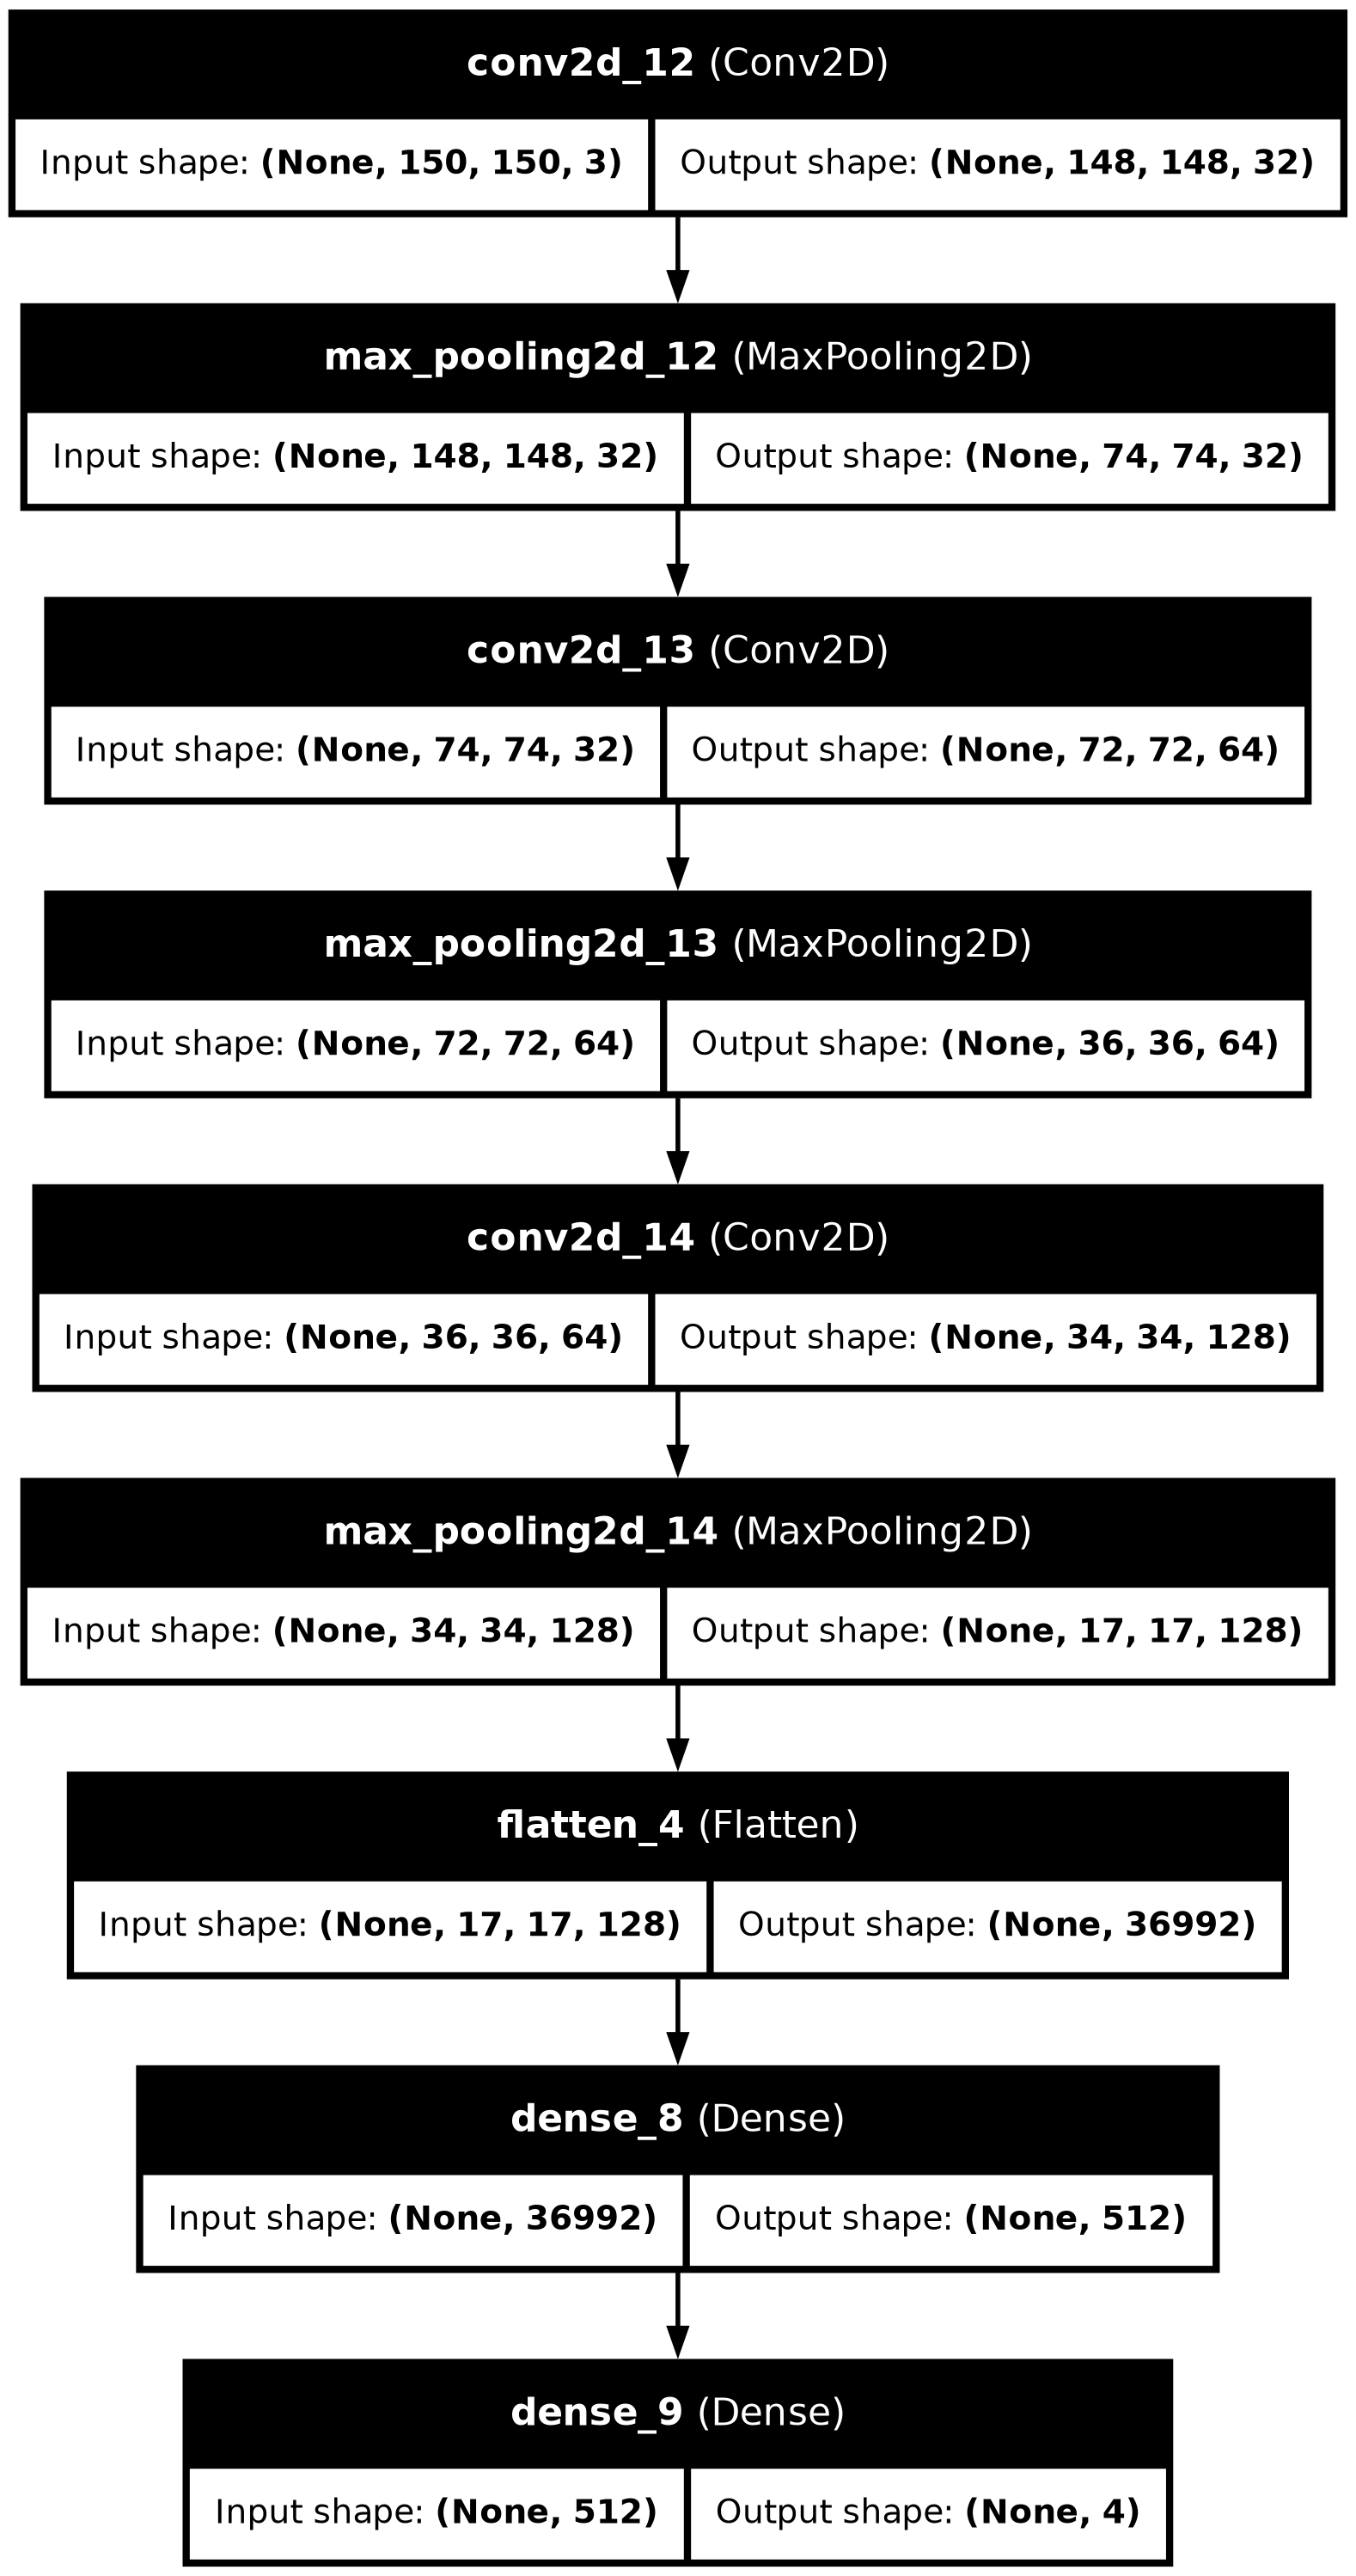

In [ ]:
model = create_model()
plot_model(model, to_file='model_schematic.png', show_shapes=True, show_layer_names=True)


In [ ]:
# Step 7: Train and Evaluate the Model
for train_ratio, test_ratio in ratios:
    print(f"\nTrain/Test Split: {int(train_ratio * 100)}% Train / {int(test_ratio * 100)}% Test")

    # Perform train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, train_size=train_ratio, test_size=test_ratio, random_state=42)

    print(f"Training samples: {len(X_train)}")
    print(f"Testing samples: {len(X_test)}")

    # Create and train the model
    model = create_model()
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

    # Evaluate on test set
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    print(f"Test Accuracy: {test_accuracy:.4f}")
    test_accuracies.append(test_accuracy)



Train/Test Split: 30% Train / 70% Test
Training samples: 1713
Testing samples: 3999


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.4481 - loss: 1.3995
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.7976 - loss: 0.5458
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.8517 - loss: 0.3998
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.8891 - loss: 0.3025
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.9380 - loss: 0.1811
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.9600 - loss: 0.1220
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.9619 - loss: 0.1008
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.9532 - loss: 0.1132
Epoch 9/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.9501 - loss: 0.1114
Epoch 10/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.9953 - loss: 0.0180
125/125 ━━━━━━━━━━━━━━━━━━━━ 32s 254ms/step - accuracy: 0.8953 - loss: 0.4490
Test Accuracy: 0.8920

Train/Test Split: 50% Train / 50% Test
Training samples: 2

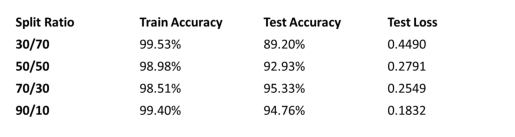

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the image
img = mpimg.imread('/kaggle/input/image-1/image.png')

# Plot the image
plt.imshow(img)
plt.axis('off')  # Hide axis labels
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Step 6: Confusion Matrix and Classification Report
y_pred = np.argmax(model.predict(X_test), axis=1)

# Initialize lists to store confusion matrices and classification reports
confusion_matrices = []
classification_reports = []


    # Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
confusion_matrices.append(cm)

18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 262ms/step


In [ ]:
for train_ratio, test_ratio in ratios:
    print(f"\nTrain/Test Split: {int(train_ratio * 100)}% Train / {int(test_ratio * 100)}% Test")

# Classification report
    cr = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
    classification_reports.append(cr)  # Append the classification report

    # Print Classification Report with the correct format
    print(f"Classification Report for {int(train_ratio * 100)}% Train:")
    print(cr)


Train/Test Split: 30% Train / 70% Test
Classification Report for 30% Train:
              precision    recall  f1-score   support

      glioma       0.94      0.95      0.94       148
  meningioma       0.91      0.88      0.89       137
     notumor       0.97      0.99      0.98       150
   pituitary       0.97      0.98      0.97       137

    accuracy                           0.95       572
   macro avg       0.95      0.95      0.95       572
weighted avg       0.95      0.95      0.95       572


Train/Test Split: 50% Train / 50% Test
Classification Report for 50% Train:
              precision    recall  f1-score   support

      glioma       0.94      0.95      0.94       148
  meningioma       0.91      0.88      0.89       137
     notumor       0.97      0.99      0.98       150
   pituitary       0.97      0.98      0.97       137

    accuracy                           0.95       572
   macro avg       0.95      0.95      0.95       572
weighted avg       0.95      0.


Train/Test Split: 30% Train / 70% Test


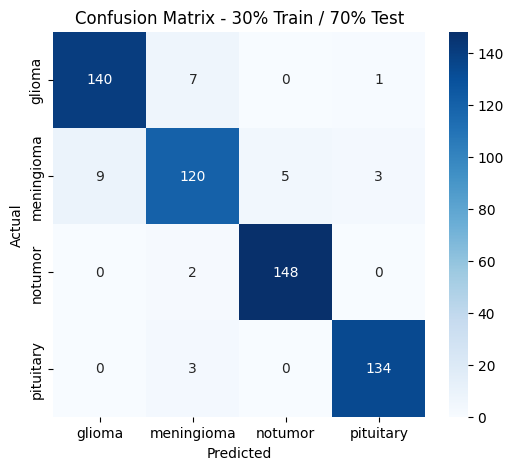


Train/Test Split: 50% Train / 50% Test


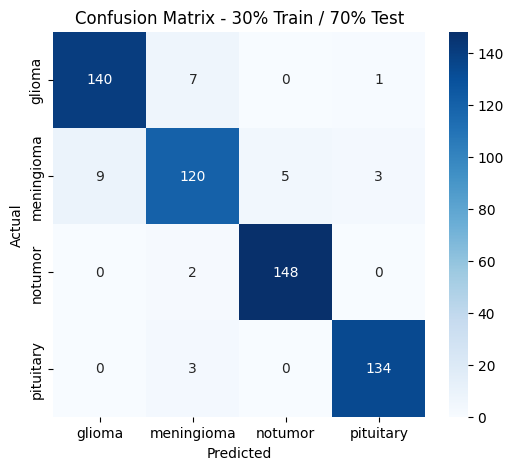


Train/Test Split: 70% Train / 30% Test


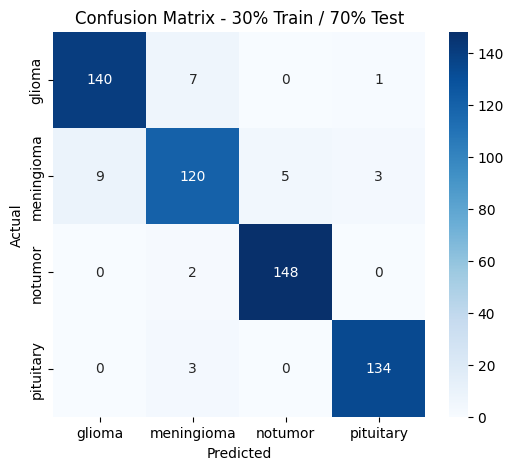


Train/Test Split: 90% Train / 10% Test


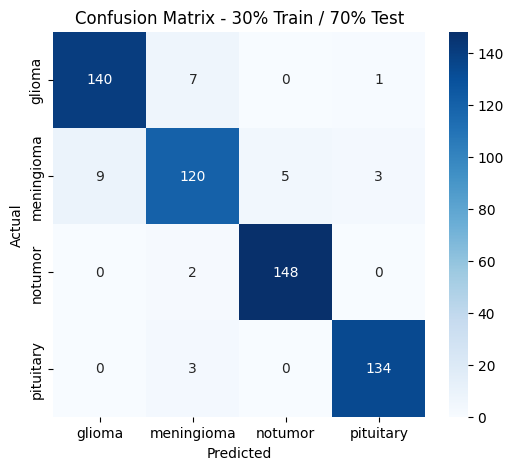

In [ ]:
for train_ratio, test_ratio in ratios:
    print(f"\nTrain/Test Split: {int(train_ratio * 100)}% Train / {int(test_ratio * 100)}% Test")

    ratios_percent = [f"{int(train_ratio * 100)}%" for train_ratio, _ in ratios]


    import seaborn as sns
# Plot Confusion Matrix for each ratio

    for i, (train_ratio, cm) in enumerate(zip(ratios_percent, confusion_matrices)):
        plt.figure(figsize=(6, 5))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
        plt.title(f"Confusion Matrix - {train_ratio} Train / {100 - int(train_ratio[:-1])}% Test")
        plt.ylabel('Actual')
        plt.xlabel('Predicted')
        plt.show()

In [ ]:
for train_ratio, test_ratio in ratios:
    print(f"\nTrain/Test Split: {int(train_ratio * 100)}% Train / {int(test_ratio * 100)}% Test")

    # Perform train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, train_size=train_ratio, test_size=test_ratio, random_state=42)


Train/Test Split: 30% Train / 70% Test

Train/Test Split: 50% Train / 50% Test

Train/Test Split: 70% Train / 30% Test

Train/Test Split: 90% Train / 10% Test


In [ ]:
train_accuracies = []
test_accuracies = []
confusion_matrices = []
classification_reports = []


In [ ]:
# Define the path where the dataset is stored
extraction_dir = '/kaggle/input/braintumor-data/Braintumor Detection'

# Function to load and preprocess images
def load_and_preprocess_images(base_dir, categories, target_size=(150, 150)):
    images = []
    labels = []

    for category in categories:
        folder_path = os.path.join(base_dir, category)
        image_files = os.listdir(folder_path)

        for img_file in image_files:
            img_full_path = os.path.join(folder_path, img_file)
            img = image.load_img(img_full_path, target_size=target_size)
            img_array = image.img_to_array(img) / 255.0  # Normalize pixel values (0-1)
            images.append(img_array)
            labels.append(category)

    return np.array(images), np.array(labels)

categories = ['glioma', 'notumor', 'meningioma', 'pituitary']
X, y = load_and_preprocess_images(extraction_dir, categories)

# Encode Labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


In [ ]:
def create_model(dropout=False, activation='relu', pooling='max'):
"""
  This function creates a CNN model based on specified parameters:
    - dropout: Whether to include dropout layers to prevent overfitting.
    - activation: Activation function for the layers.
    - pooling: Pooling method (max or average pooling)."""

    model = Sequential()

    # First Convolutional Layer
    model.add(Conv2D(32, (3, 3), activation=activation, input_shape=(150, 150, 3)))
    if pooling == 'max':
        model.add(MaxPooling2D(pool_size=(2, 2)))
    else:
        model.add(AveragePooling2D(pool_size=(2, 2)))

    # Second Convolutional Layer
    model.add(Conv2D(64, (3, 3), activation=activation))
    if pooling == 'max':
        model.add(MaxPooling2D(pool_size=(2, 2)))
    else:
        model.add(AveragePooling2D(pool_size=(2, 2)))

    # Dropout Layer if specified
    if dropout:
        model.add(Dropout(0.5))

    # Flatten and Output Layer
    model.add(Flatten())
    model.add(Dense(128, activation=activation))
    model.add(Dense(len(categories), activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model


In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, AveragePooling2D
from tensorflow.keras.preprocessing import image


In [ ]:
# Define train/test split
train_ratio = 0.9
test_ratio = 0.1

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, train_size=train_ratio, test_size=test_ratio, random_state=42)

# Configurations to test
configurations = [
    {'dropout': True, 'activation': 'relu', 'pooling': 'max'},
    {'dropout': True, 'activation': 'relu', 'pooling': 'avg'},
    {'dropout': False, 'activation': 'relu', 'pooling': 'max'},
    {'dropout': False, 'activation': 'relu', 'pooling': 'avg'},
    {'dropout': True, 'activation': 'sigmoid', 'pooling': 'max'},
    {'dropout': True, 'activation': 'sigmoid', 'pooling': 'avg'},
    {'dropout': False, 'activation': 'sigmoid', 'pooling': 'max'},
    {'dropout': False, 'activation': 'sigmoid', 'pooling': 'avg'},
]

results = []

for config in configurations:
    print(f"Training with config: {config}")
    model = create_model(dropout=config['dropout'], activation=config['activation'], pooling=config['pooling'])
    model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=1)
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    results.append((config, test_accuracy))  # Store results
    print(f"Test Accuracy: {test_accuracy:.4f}")


Training with config: {'dropout': True, 'activation': 'relu', 'pooling': 'max'}


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
161/161 ━━━━━━━━━━━━━━━━━━━━ 107s 654ms/step - accuracy: 0.5909 - loss: 1.0186
Epoch 2/5
161/161 ━━━━━━━━━━━━━━━━━━━━ 106s 656ms/step - accuracy: 0.8736 - loss: 0.3340
Epoch 3/5
161/161 ━━━━━━━━━━━━━━━━━━━━ 107s 665ms/step - accuracy: 0.9312 - loss: 0.1836
Epoch 4/5
161/161 ━━━━━━━━━━━━━━━━━━━━ 106s 661ms/step - accuracy: 0.9640 - loss: 0.1059
Epoch 5/5
161/161 ━━━━━━━━━━━━━━━━━━━━ 107s 667ms/step - accuracy: 0.9716 - loss: 0.0734
Test Accuracy: 0.9493
Training with config: {'dropout': True, 'activation': 'relu', 'pooling': 'avg'}
Epoch 1/5
161/161 ━━━━━━━━━━━━━━━━━━━━ 102s 624ms/step - accuracy: 0.5717 - loss: 1.0124
Epoch 2/5
161/161 ━━━━━━━━━━━━━━━━━━━━ 143s 628ms/step - accuracy: 0.8717 - loss: 0.3450
Epoch 3/5
161/161 ━━━━━━━━━━━━━━━━━━━━ 101s 628ms/step - accuracy: 0.9215 - loss: 0.2141
Epoch 4/5
161/161 ━━━━━━━━━━━━━━━━━━━━ 142s 626ms/step - accuracy: 0.9499 - loss: 0.1400
Epoch 5/5
161/161 ━━━━━━━━━━━━━━━━━━━━ 102s 630ms/step - accuracy: 0.9643 - loss: 0.1071
Test Acc

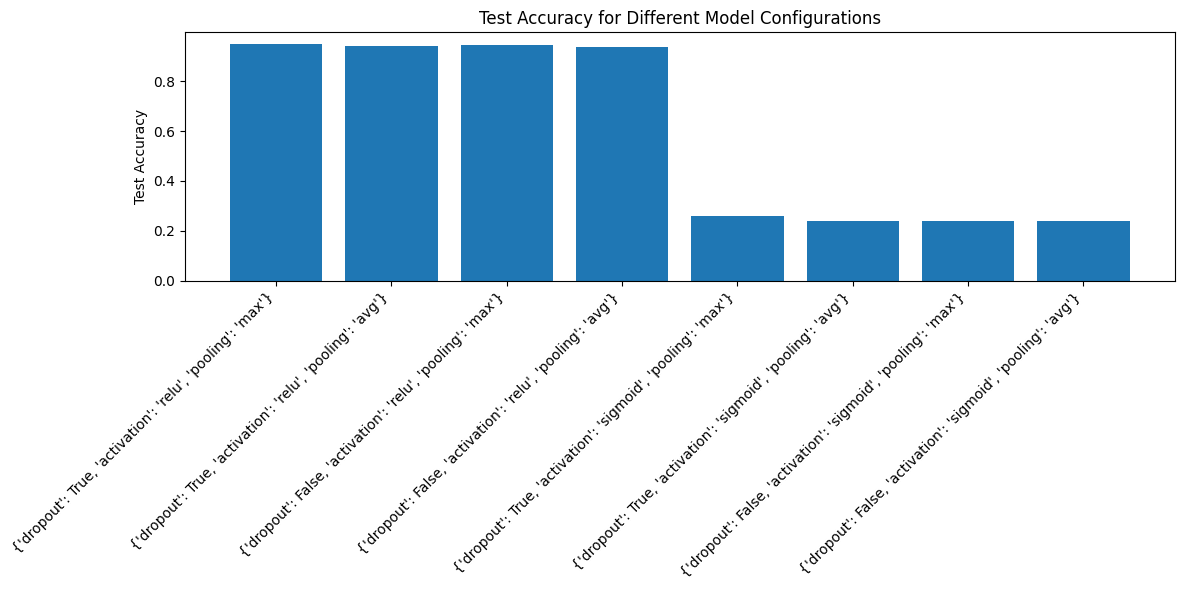

In [ ]:
# Separate the configurations and their corresponding accuracies
configs, accuracies = zip(*results)

# Plot the accuracies
plt.figure(figsize=(12, 6))
plt.bar(range(len(configs)), accuracies, tick_label=[str(config) for config in configs])
plt.xticks(rotation=45, ha='right')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy for Different Model Configurations')
plt.tight_layout()
plt.show()


In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.preprocessing import LabelEncoder


In [ ]:
extraction_dir = '/kaggle/input/braintumor-data/Braintumor Detection'

# Verify the contents of the directory to ensure the data is there
print("Directory contents:", os.listdir(extraction_dir))

# Categories (subfolders) within the extraction directory
categories = ['glioma', 'notumor', 'meningioma', 'pituitary']

Directory contents: ['pituitary', 'notumor', 'meningioma', 'glioma']


In [ ]:
def load_and_preprocess_images(base_dir, categories, target_size=(150, 150)):
    images = []
    labels = []

    for category in categories:
        folder_path = os.path.join(base_dir, category)
        image_files = os.listdir(folder_path)

        for img_file in image_files:
            img_full_path = os.path.join(folder_path, img_file)
            img = image.load_img(img_full_path, target_size=target_size)
            img_array = image.img_to_array(img) / 255.0  # Normalize pixel values (0-1)
            images.append(img_array)
            labels.append(category)

    return np.array(images), np.array(labels)

categories = ['glioma', 'notumor', 'meningioma', 'pituitary']
X, y = load_and_preprocess_images(extraction_dir, categories)

# Encode Labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


In [ ]:
from tensorflow.keras.initializers import HeNormal, GlorotUniform
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import AveragePooling2D, Dropout, Flatten, Dense, Conv2D
from tensorflow.keras.models import Sequential

# Define the model creation function with weight initializer, learning rate, and dropout as parameters
def create_configurable_model(weight_initializer, learning_rate, dropout=True):
    model = Sequential()

    # First Convolutional Layer with configurable initializer
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer=weight_initializer, input_shape=(150, 150, 3)))
    model.add(AveragePooling2D(pool_size=(2, 2)))

    # Second Convolutional Layer
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer=weight_initializer))
    model.add(AveragePooling2D(pool_size=(2, 2)))

    # Third Convolutional Layer
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer=weight_initializer))
    model.add(AveragePooling2D(pool_size=(2, 2)))

    # Flatten the model
    model.add(Flatten())

    # Fully connected Dense layer with optional Dropout
    model.add(Dense(128, activation='relu', kernel_initializer=weight_initializer))
    if dropout:
        model.add(Dropout(0.5))  # Dropout to avoid overfitting

    # Output Layer
    model.add(Dense(len(categories), activation='softmax'))

    # Compile the model with Adam optimizer and the given learning rate
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model



In [ ]:
# Configurations to compare
configurations = [
    {'initializer': HeNormal(), 'learning_rate': 0.001},
    {'initializer': GlorotUniform(), 'learning_rate': 0.001},
    {'initializer': HeNormal(), 'learning_rate': 0.0001},
    {'initializer': GlorotUniform(), 'learning_rate': 0.0001},
]

# Iterate through each configuration
for config in configurations:
    print(f"\nTraining with config: Weight Initializer = {config['initializer'].__class__.__name__}, Learning Rate = {config['learning_rate']}")

    # Create the model with the current configuration
    model = create_configurable_model(config['initializer'], config['learning_rate'])

    # Split the dataset (90% train, 10% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, train_size=0.9, test_size=0.1, random_state=42)

    # Train the model
    model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=1)

    # Evaluate the model on the test set
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"Test Accuracy: {test_accuracy:.4f}")



Training with config: Weight Initializer = HeNormal, Learning Rate = 0.001


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
161/161 ━━━━━━━━━━━━━━━━━━━━ 113s 693ms/step - accuracy: 0.6073 - loss: 1.1074
Epoch 2/5
161/161 ━━━━━━━━━━━━━━━━━━━━ 113s 699ms/step - accuracy: 0.8564 - loss: 0.4045
Epoch 3/5
161/161 ━━━━━━━━━━━━━━━━━━━━ 111s 691ms/step - accuracy: 0.8997 - loss: 0.2813
Epoch 4/5
161/161 ━━━━━━━━━━━━━━━━━━━━ 111s 691ms/step - accuracy: 0.9167 - loss: 0.2317
Epoch 5/5
161/161 ━━━━━━━━━━━━━━━━━━━━ 111s 688ms/step - accuracy: 0.9385 - loss: 0.1877
Test Accuracy: 0.9336

Training with config: Weight Initializer = GlorotUniform, Learning Rate = 0.001
Epoch 1/5
161/161 ━━━━━━━━━━━━━━━━━━━━ 113s 694ms/step - accuracy: 0.5357 - loss: 1.0414
Epoch 2/5
161/161 ━━━━━━━━━━━━━━━━━━━━ 111s 691ms/step - accuracy: 0.7769 - loss: 0.5601
Epoch 3/5
161/161 ━━━━━━━━━━━━━━━━━━━━ 111s 691ms/step - accuracy: 0.8394 - loss: 0.4214
Epoch 4/5
161/161 ━━━━━━━━━━━━━━━━━━━━ 114s 706ms/step - accuracy: 0.8596 - loss: 0.3314
Epoch 5/5
161/161 ━━━━━━━━━━━━━━━━━━━━ 111s 686ms/step - accuracy: 0.9030 - loss: 0.2714
Test Ac